<a href="https://colab.research.google.com/github/thegrouch4413/Predictive-Analysis/blob/main/Heart_Attack_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/heart_attack.csv')

In [15]:
df.shape

(3656, 16)

In [16]:
df.head()

,male,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,heart_attack
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [17]:
df.dtypes

male                  int64
age                   int64
education           float64
current_smoker        int64
cigs_per_day        float64
bp_meds             float64
prevalent_stroke      int64
prevalent_hyp         int64
diabetes              int64
tot_chol            float64
sys_bp              float64
dia_bp              float64
bmi                 float64
heart_rate          float64
glucose             float64
heart_attack          int64
dtype: object

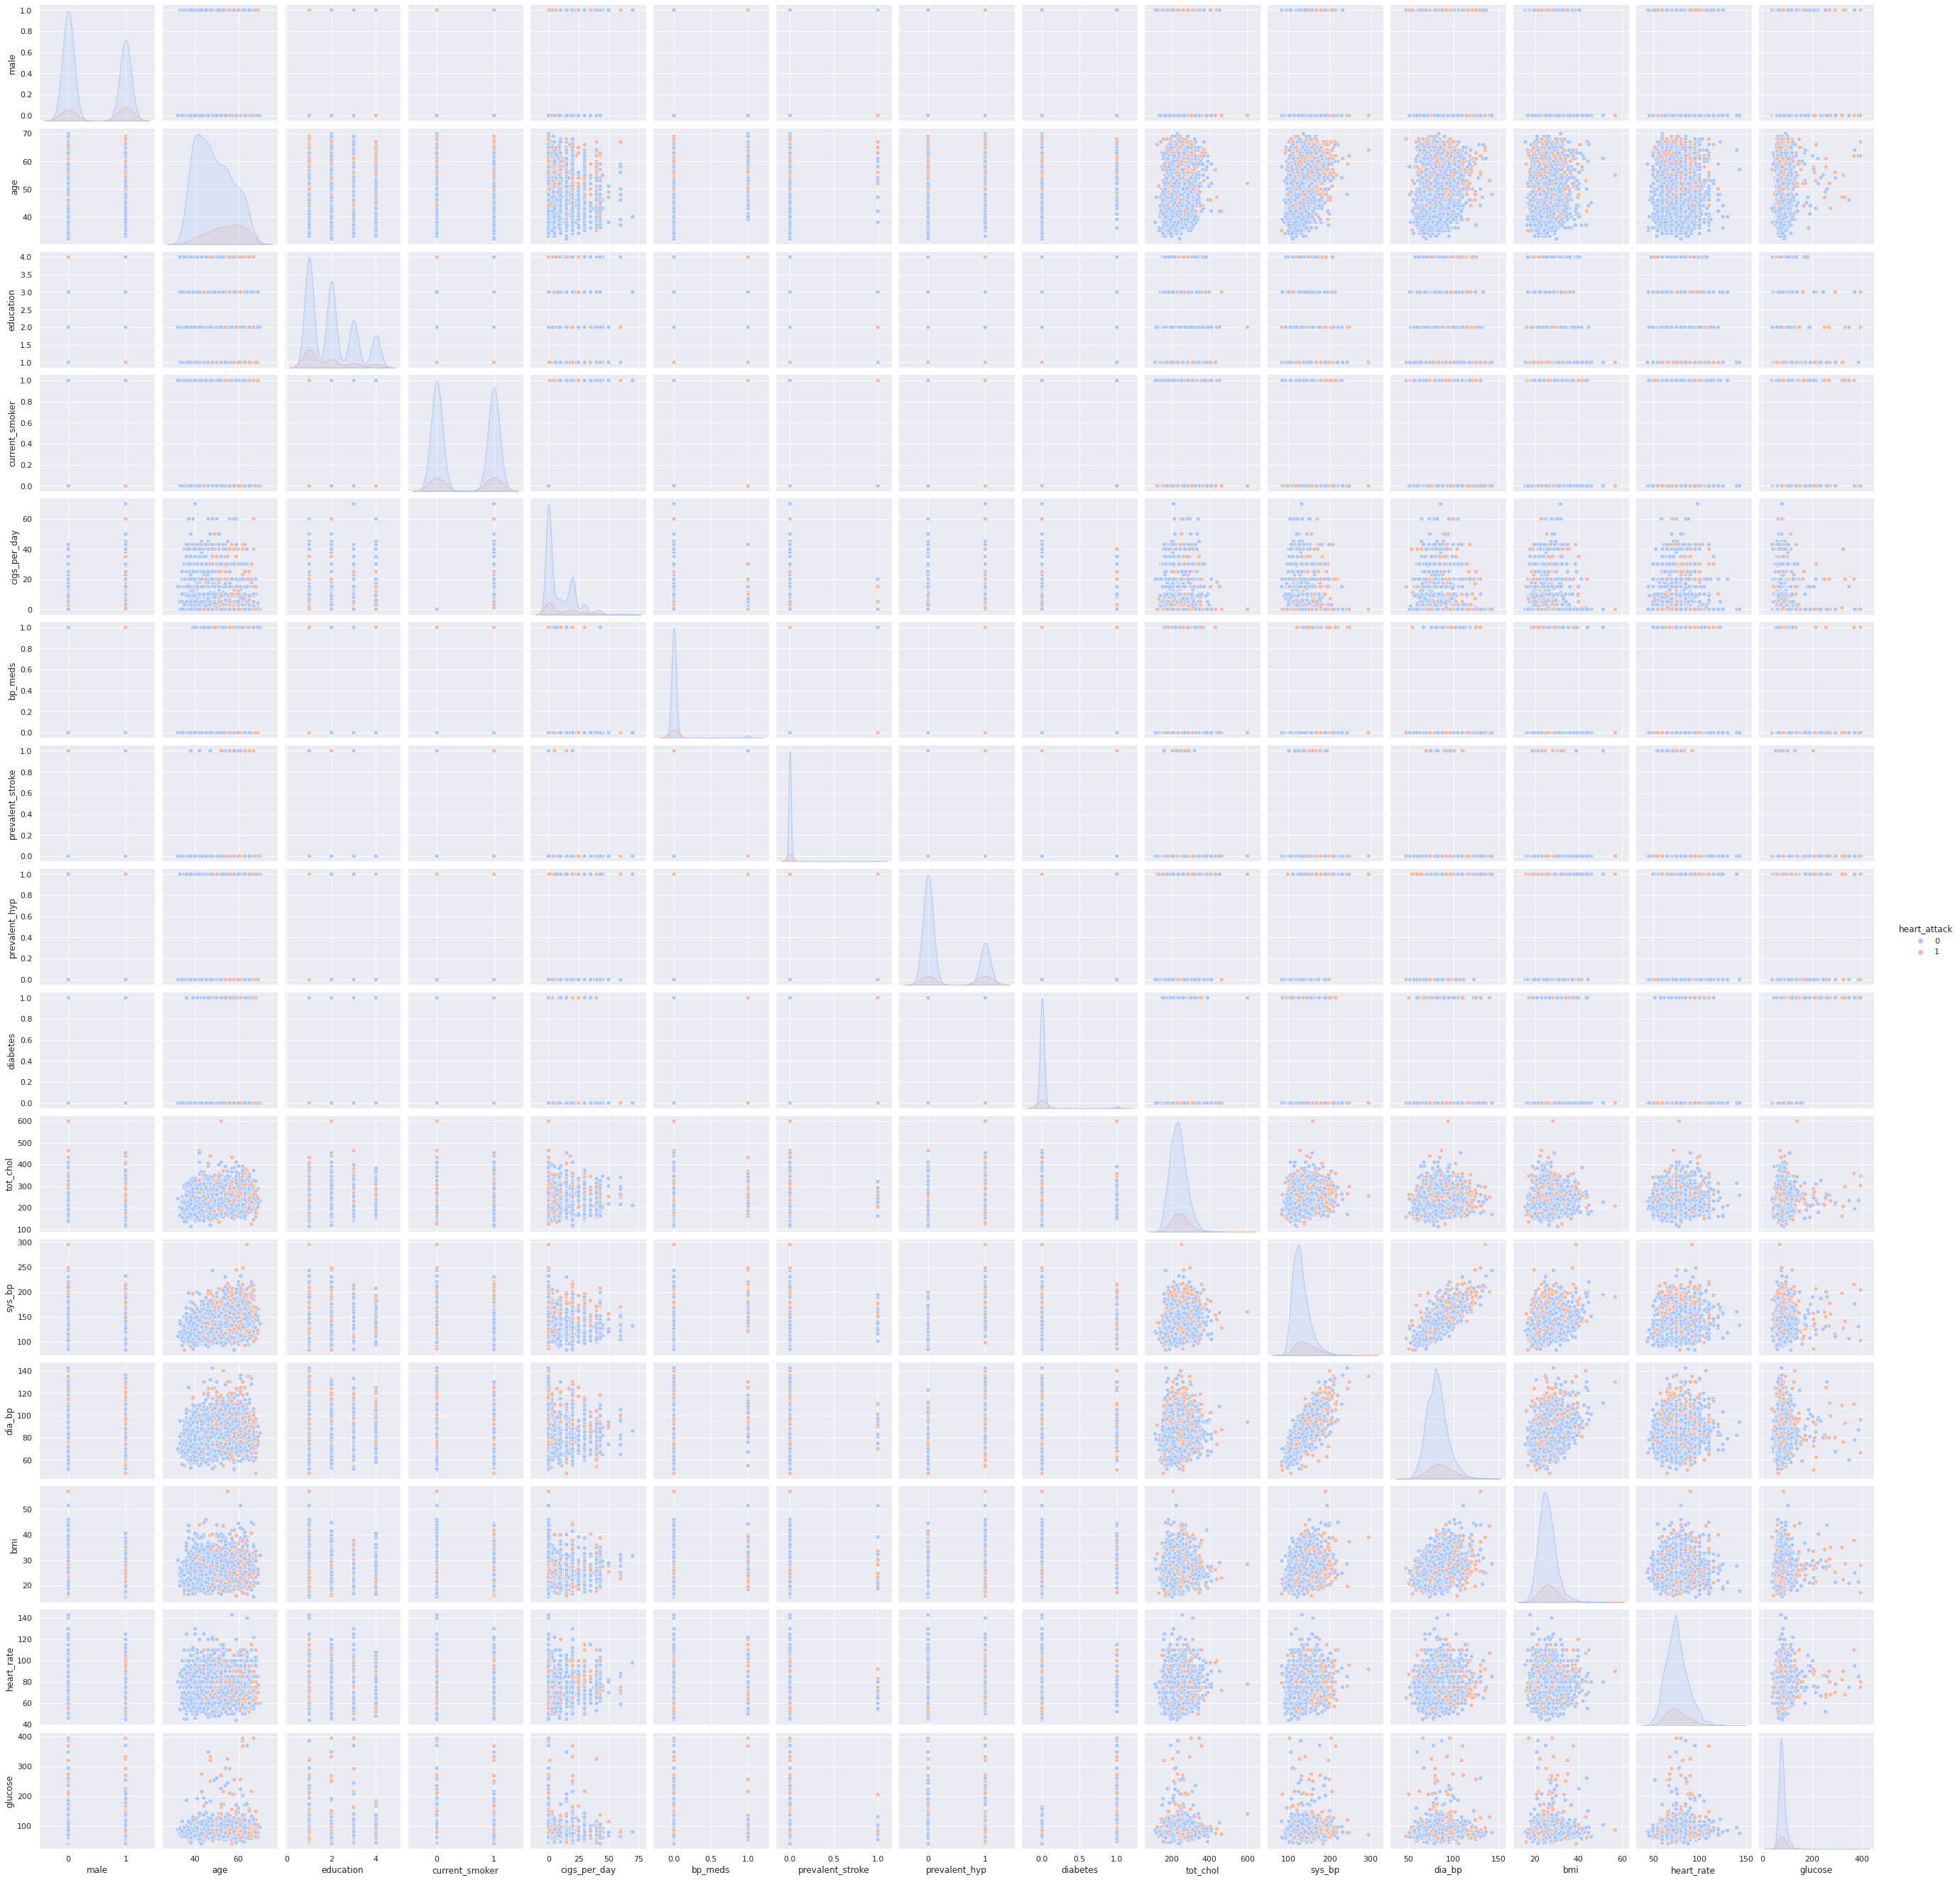

In [18]:
sns.pairplot(df,hue='heart_attack',palette='coolwarm')

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(df.drop('heart_attack',axis=1))

StandardScaler()

In [22]:
scaled_features = scaler.transform(df.drop('heart_attack',axis=1))

In [23]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,male,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose
0,1.119825,-1.233351,1.975752,-0.978352,-0.757068,-0.176951,-0.076008,-0.672698,-0.166831,-0.949714,-1.193695,-1.078415,0.291688,0.356340,-0.203127
1,-0.892997,-0.415591,0.019795,-0.978352,-0.757068,-0.176951,-0.076008,-0.672698,-0.166831,0.297729,-0.514637,-0.159695,0.724614,1.608289,-0.244956
2,1.119825,-0.181945,-0.958183,1.022127,0.921174,-0.176951,-0.076008,-0.672698,-0.166831,0.184325,-0.220378,-0.243215,-0.109261,-0.060977,-0.495930
3,-0.892997,1.336754,0.997773,1.022127,1.760294,-0.176951,-0.076008,1.486551,-0.166831,-0.269291,0.798209,1.009584,0.687717,-0.895610,0.884427
4,-0.892997,-0.415591,0.997773,1.022127,1.172910,-0.176951,-0.076008,-0.672698,-0.166831,1.091556,-0.107202,0.090864,-0.660258,0.773656,0.131505


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['heart_attack'], test_size=0.30)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [29]:
pred = knn.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(confusion_matrix(y_test,pred))

[[804 108]
 [152  33]]


In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       912
           1       0.23      0.18      0.20       185

    accuracy                           0.76      1097
   macro avg       0.54      0.53      0.53      1097
weighted avg       0.74      0.76      0.75      1097



In [35]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

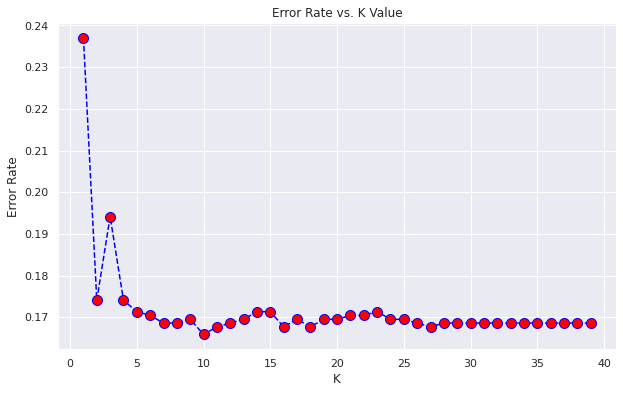

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [41]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=10')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=10


[[908   4]
 [178   7]]


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       912
           1       0.64      0.04      0.07       185

    accuracy                           0.83      1097
   macro avg       0.74      0.52      0.49      1097
weighted avg       0.80      0.83      0.77      1097

